# Investigating trends in COVID-19 survey responses based on patient status using SVM

BIOF 509 Final Project

In [230]:
# import all required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


# we will define a class SVM which will preprocess the data, scale data, reduce dimensions, 
#run SVM using a specified kernel, and return the accuracy of the model, along with a confusion matrix
#and indication of which features were most important for each prinicipal component

class SVM:
    def __init__(self, excel,kernel="linear",  n_components =4): #excel is a variable representing your path to your datafile. Specify which kernel you want to use for SVM
        self.data = pd.read_excel(excel)
        self.data = self.data.dropna() #drop any empty cells
        #make sure your labels are in the first column of your dataset, and the data are in the following columns
        self.target = self.data.iloc[:, 0] #data from the first column saved as target
        self.data = self.data.iloc[:, 1:] #data from second column onwards saved as data
        self.df_list = list(self.data.columns) # create a list of your feature names for later
        self.data = self.data.values #convert to array for computations
    
    #scale the data using normalization because we do not have a Gaussian distribution
    def scale(self):
        self.scaler = MinMaxScaler()
        self.data = self.scaler.fit_transform(self.data)
        return self.data
    
    #use PCA for dimensionality reduction with 4 components
    def pca(self,n_components):
            self.data_reducer = PCA(n_components= n_components)
            self.data= self.data_reducer.fit_transform(self.data)
            return self.data
# SVM
    def svm(self, kernel):
    #training dataset
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, self.target, test_size=0.3,random_state=509) 
        self.svm_model = SVC(kernel=kernel)  
    #fit the model with the training dataset
        self.svm_model.fit(self.X_train, self.y_train)
    #test model
        self.y_pred = self.svm_model.predict(self.X_test)
        
    #return SVM accuracy
    def accuracy(self):
        self.accuracy = accuracy_score(self.y_pred,self.y_test)
        return self.accuracy
        
    #generate and return a confusion matrix
    def confusion_matrix(self):
        self.cm = confusion_matrix(self.y_test, self.y_pred, normalize ='true')
        self.cm = pd.DataFrame(self.cm, index=[0,1],columns=[0,1])
        self.heatmap = sns.heatmap(self.cm, annot=True)
        return self.heatmap
    
      #return the important features from PCA
    def pca_features(self):
        self.top_features = [np.abs(self.data_reducer.components_[i]).argmax() for i in range(self.data_reducer.components_.shape[0])]
        self.top_feature_names = [self.df_list[self.top_features[i]] for i in range(self.data_reducer.components_.shape[0])]
        for n,name in enumerate(self.top_feature_names):
            print("#" + str(n) + ": " + str(name))
    


#0: Sum of Conscientousness
#1: ISOLATED
#2: TREATMENT_MENTAL_HEALTH
#3: WORRY_INFECTED


0.65

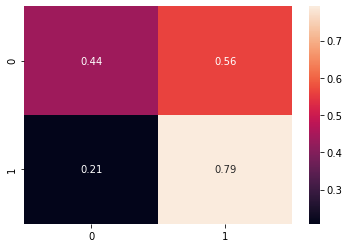

In [231]:
data= '/Users/goyalsl/Desktop/COVID19_DATA.xlsx'
demo = SVM(data, kernel="rbf",n_components =4)
demo.svm(kernel="rbf")
demo.scale()
demo.pca(4)
demo.confusion_matrix()
demo.pca_features()
demo.accuracy()
